# Exercise 18

## Analyze class homeworks


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from unicodedata import normalize
from wordcloud import WordCloud,STOPWORDS
import string
from nltk import wordpunct_tokenize
from sklearn.model_selection import train_test_split
df = pd.read_excel('../datasets/E18.xlsx')
df.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

In [2]:
print(pd.isnull(df).sum())

Sexo     0
T1       1
T2      12
T3      12
T4       6
T5       7
T6      13
dtype: int64


In [3]:
print(df.groupby('Sexo').count())

      T1  T2  T3  T4  T5  T6
Sexo                        
H     33  25  23  28  27  25
M      8   5   7   8   8   4


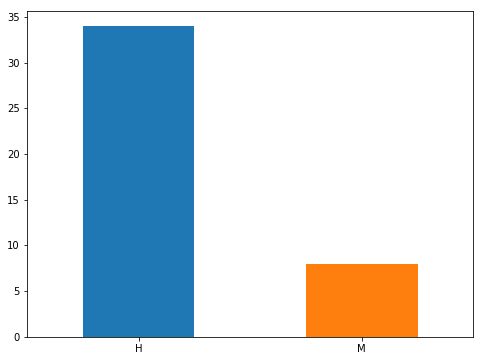

In [4]:
pd.Series(df["Sexo"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

In [5]:
df = df.replace(np.nan, '', regex=True)

In [6]:
for column in df.columns:
    df[column] = df[column].astype(str)
df['Sexo'] = df['Sexo'].map({'H':1,'M':0})
df['Text'] =  df[['T1', 'T2', 'T3', 'T4', 'T5']].apply(lambda x: ''.join(x), axis=1)
df['Len_Text'] = df['Text'].apply(len)
df.describe()

,Sexo,Len_Text
count,42.000000,42.000000
mean,0.809524,8568.333333
std,0.397437,3483.589106
min,0.000000,1431.000000
25%,1.000000,6752.750000
50%,1.000000,8566.500000
75%,1.000000,9644.750000
max,1.000000,22077.000000


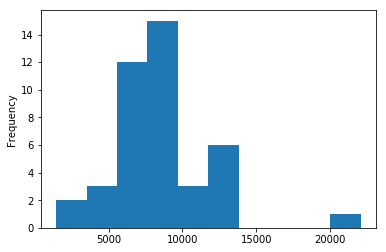

In [7]:
df['Len_Text'].plot(kind='hist')

In [8]:
from py_translator import Translator
df['Text'][38] = Translator().translate(text=df['Text'][38], dest='es').text

In [9]:
stop_words = set(stopwords.words('spanish'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
df['Text'] = df['Text'].apply(lambda x: x.lower())
df['Text'] = df['Text'].apply(removeStopWords)
df['Text'] = df['Text'].apply(cleanHtml)
df['Text'] = df['Text'].astype(str)
df['Text'].head(3)

0     científico  datos   ingeniero  datos  ciertas...
1    aunque  dos perfiles cuentan  habilidades   co...
2    python vs stata. analizar información   proces...
Name: Text, dtype: object

In [10]:
trans_tab = dict.fromkeys(map(ord, u'\u0301\u0308'), None)
df['Text'] = df['Text'].apply(lambda x: normalize('NFKC', normalize('NFKD', x).translate(trans_tab)))
df['Text'] = df['Text'].apply(cleanPunc)

df['Text'].head(3)

0    cientifico  datos   ingeniero  datos  ciertas ...
1    aunque  dos perfiles cuentan  habilidades   co...
2    python vs stata  analizar informacion   proces...
Name: Text, dtype: object

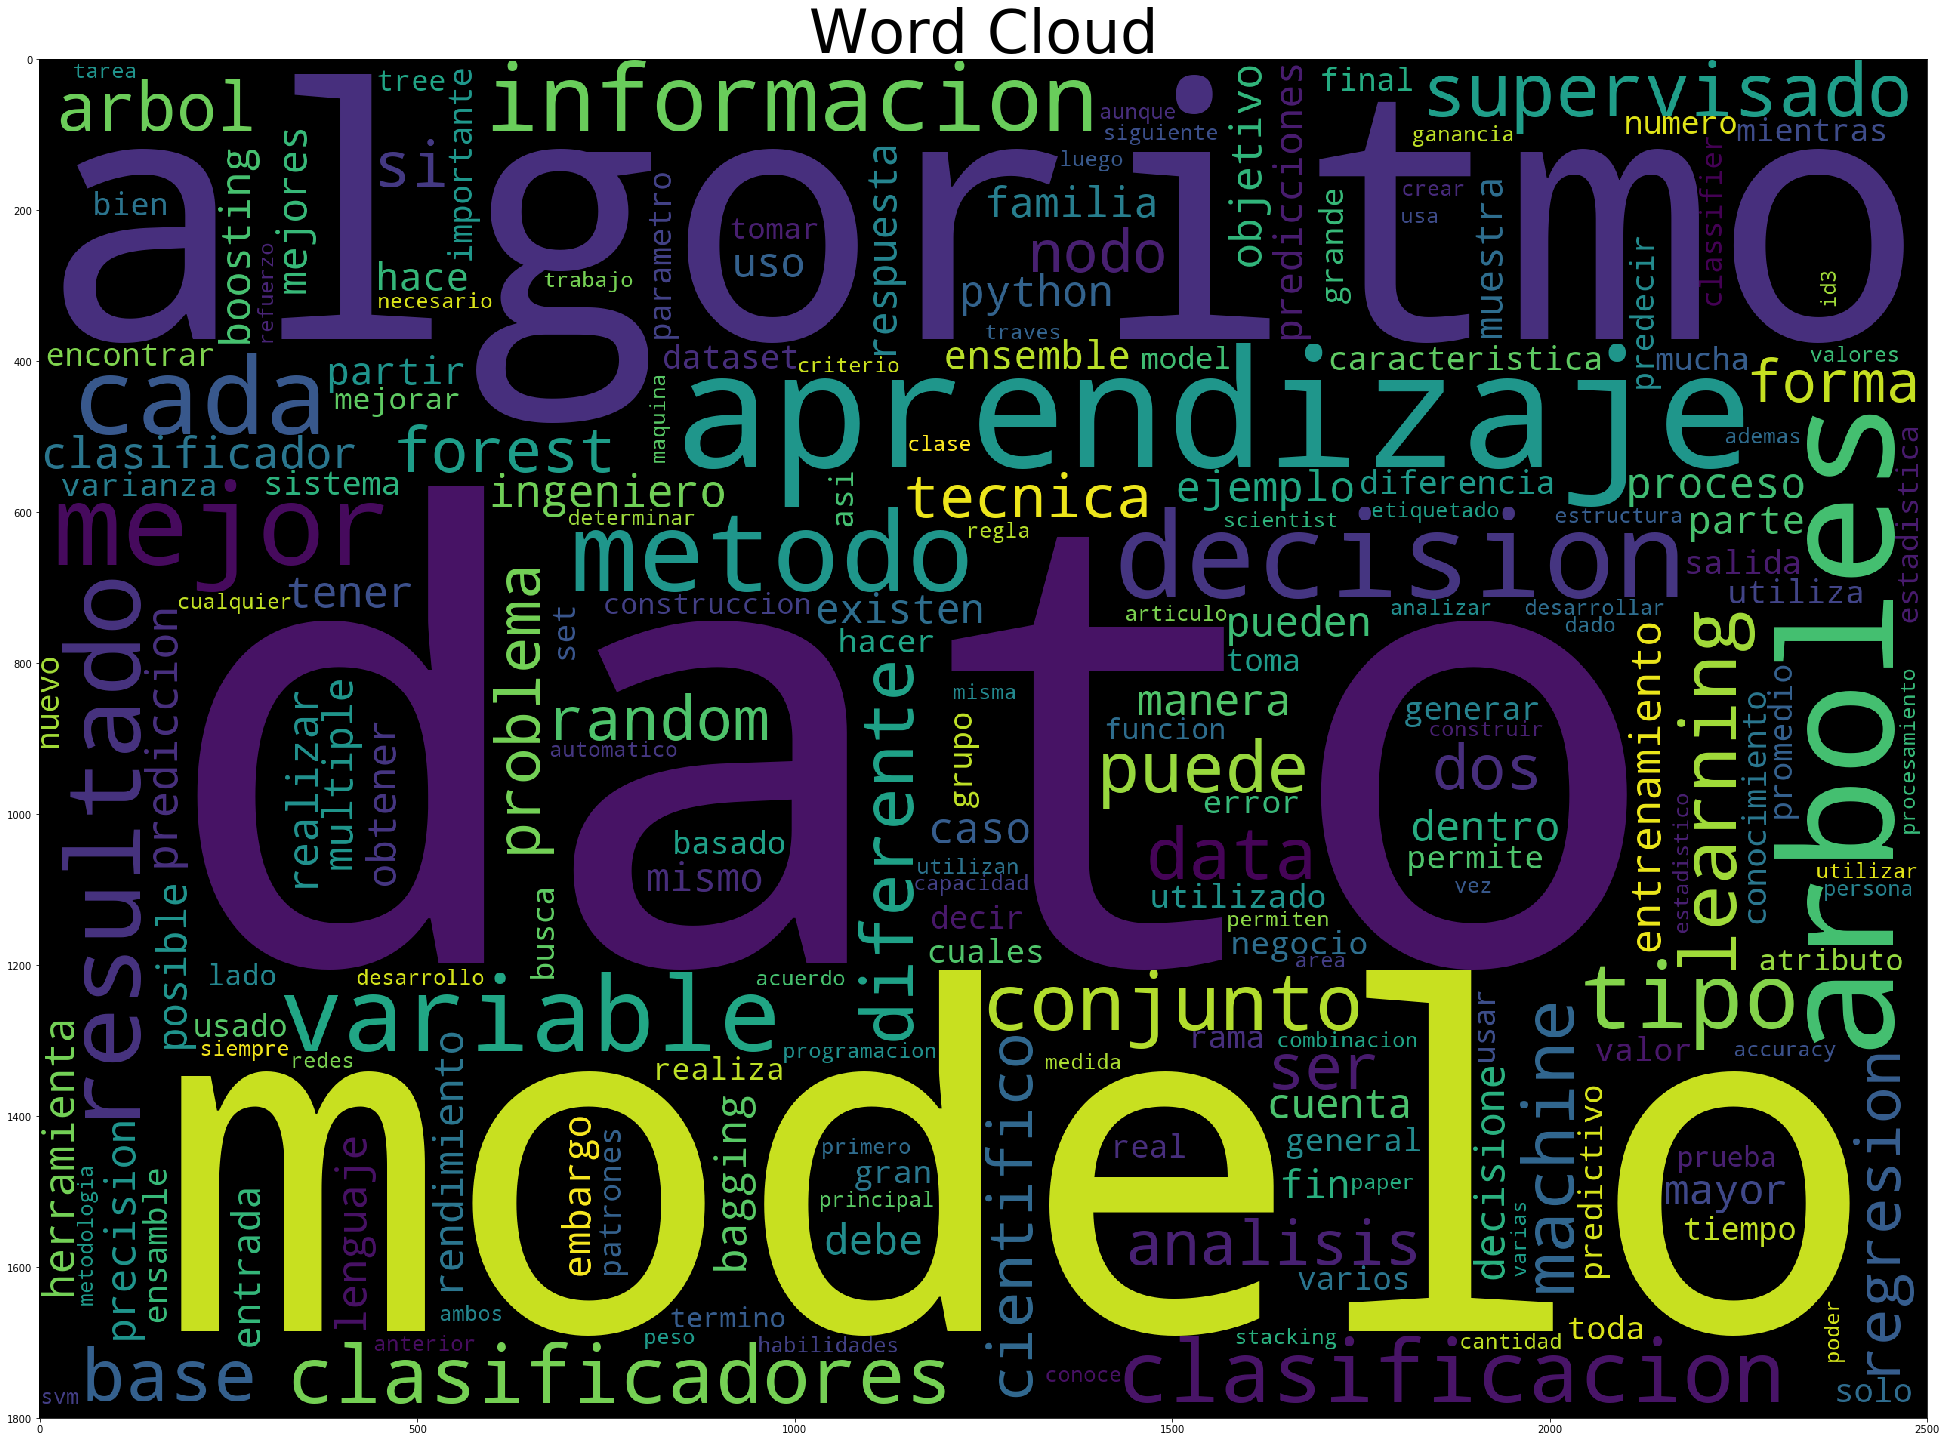

In [11]:
plt.figure(figsize=(40,25))
subset = df["Text"]
text = subset.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.title("Word Cloud",fontsize=60)
plt.imshow(cloud_toxic)

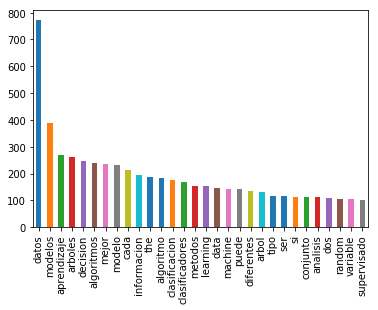

In [12]:
pd.Series(' '.join(df['Text']).split()).value_counts()[:30].plot(kind='bar')

In [13]:
stemmer = SnowballStemmer("spanish")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
df['Text'] = df['Text'].apply(stemming)
df.Text.head(3)

0    cientif dat ingenier dat ciert habil comun eje...
1    aunqu dos perfil cuent habil comun exist difer...
2    python vs stat analiz informacion proces neces...
Name: Text, dtype: object

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

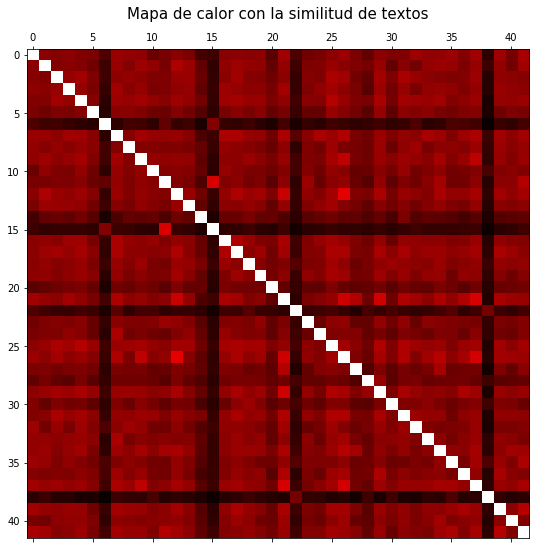

In [14]:
def similarity(data):
    results = pd.DataFrame(0, index=data.index, columns=data.index)
    for i in range(len(data)):
        for j in range(len(data)):
            results.loc[i,j] = float(len((set(data["Text"][i].split())).intersection((set(data["Text"][j].split()))))) / (len((set(data["Text"][i].split()))) + len((set(data["Text"][j].split()))) - len((set(data["Text"][i].split())).intersection((set(data["Text"][j].split())))))
    assert results.shape == (data.shape[0], data.shape[0])
    return results
simil = similarity(df)
fig = plt.figure(figsize = (9,9)) 
ax3 = fig.add_subplot(111)
ax3.matshow(simil, cmap=plt.cm.hot, aspect='auto') 
ax3.set_title('Mapa de calor con la similitud de textos', fontsize=15)
plt.show()

Como se puede observar, entre más oscuro es el color, mayor similitud se encuentran entre los documentos. Las tareas del estudiante 6, 15, 22 y 38 son muy similares bajo esta forma de identificación de similitud (determinada por el número de palabras en común entre 2 textos).

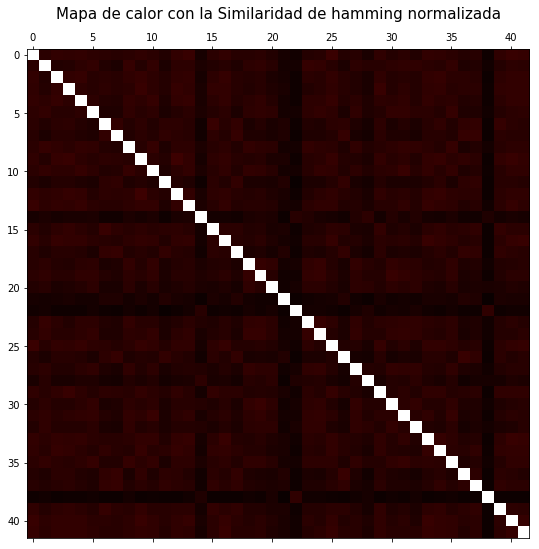

In [15]:
import textdistance
def similarity_ham(data):
    results = pd.DataFrame(0, index=data.index, columns=data.index)
    for i in range(len(data)):
        for j in range(len(data)):
            results.loc[i,j] = textdistance.hamming.normalized_similarity(data['Text'][i], data['Text'][j])
    assert results.shape == (data.shape[0], data.shape[0])
    return results
simil2 = similarity_ham(df)
fig = plt.figure(figsize = (9,9)) 
ax3 = fig.add_subplot(111)
ax3.matshow(simil2, cmap=plt.cm.hot, aspect='auto') 
ax3.set_title('Mapa de calor con la Similaridad de hamming normalizada', fontsize=15)
plt.show()

con el algoritmo de similaridad de hamming se puede ver que todos son demasiado parecidos, en este caso los estudiantes 14, 21, 22, 28 y 38 tienen un color más oscuro lo que significa que son muy similares en comparación con los demás.

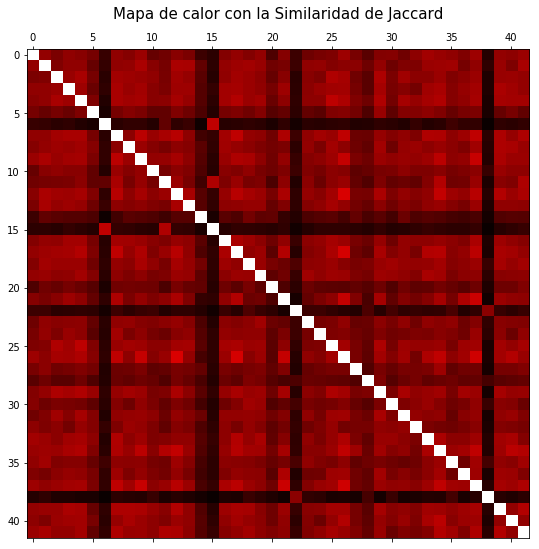

In [16]:
def similarity_jacc(data):
    results = pd.DataFrame(0, index=data.index, columns=data.index)
    for i in range(len(data)):
        for j in range(len(data)):
            tokens_1 = data['Text'][i].split()
            tokens_2 = data['Text'][j].split()
            results.loc[i,j] = textdistance.jaccard(tokens_1 , tokens_2)
    assert results.shape == (data.shape[0], data.shape[0])
    return results
simil4 = similarity_jacc(df)
fig = plt.figure(figsize = (9,9)) 
ax3 = fig.add_subplot(111)
ax3.matshow(simil4, cmap=plt.cm.hot, aspect='auto') 
ax3.set_title('Mapa de calor con la Similaridad de Jaccard', fontsize=15)
plt.show()

Bajo la similitud de Jaccard, los estudiantes 6, 15, 22 y 38 son muy similares en sus tareas respecto a todos los demás.

# Exercise 18.3

Create a classifier to predict the sex of each student



In [17]:
df.Text.head(3)
from sklearn.feature_extraction.text import TfidfVectorizer
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
vect = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=1, max_df=0.4, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
X_dtm = vect.fit_transform(df['Text'])
y = df.Sexo
x_train, x_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   56.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [22]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=400, random_state=1, n_jobs=-1, bootstrap=True, max_depth=30, max_features='sqrt',
                            min_samples_leaf=1,min_samples_split=5)
print(cross_val_score(clf, X_dtm, y, cv=5, scoring='accuracy').mean())

0.8130952380952381
